In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel = pd.read_excel('Hotel_List.xlsx')
hotel.drop('website', axis=1, inplace=True)
hotel.rename(columns={'type': 'category'}, inplace=True)
hotel = hotel.sort_values(by=['reviews_count', 'rating'], ascending=False)
hotel

,name,category,address_full,latitude,longitude,rating,reviews_count
47,Mercure Surabaya Grand Mirama,Hotel,"Mercure Surabaya Grand Mirama, Jl. Raya Darmo ...",-7.284845,112.739307,4.6,17176
14,JW Marriott Hotel Surabaya,Hotel,"JW Marriott Hotel Surabaya, Jl. Embong Malang ...",-7.259397,112.734548,4.7,17020
40,Vasa Hotel Surabaya,Hotel,"Vasa Hotel Surabaya, Jl. Mayjen HR. Muhammad N...",-7.286145,112.699322,4.7,15863
44,favehotel Rungkut Surabaya,Hotel,"favehotel Rungkut Surabaya, Jl. Raya Kalirungk...",-7.320455,112.772306,4.7,12515
159,Bumi Surabaya City Resort,Resort hotel,"Bumi Surabaya City Resort, Jl. Jenderal Basuki...",-7.271086,112.741175,4.7,12502
...,...,...,...,...,...,...,...
354,OYO 93114 Salak Homestay,Hotel,"OYO 93114 Salak Homestay, Jl. Salak No.11, RW....",-7.250498,112.754851,1.0,1
371,OYO 92270 Grand Village Syariah,Hotel,"MQJ7+P7Q OYO 92270 Grand Village Syariah, Jl. ...",-7.318157,112.763234,1.0,1
377,reddoorz surabaya,Hotel,"reddoorz surabaya, Jl. KH Abdul Wahab Siamin S...",-7.291914,112.706206,1.0,1
396,OYO 92267 Nurul Homestay Syariah,Hotel,"RMM2+WQ5 OYO 92267 Nurul Homestay Syariah, RT....",-7.165244,112.651988,1.0,1


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 47 to 418
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           507 non-null    object 
 1   category       507 non-null    object 
 2   address_full   507 non-null    object 
 3   latitude       507 non-null    float64
 4   longitude      507 non-null    float64
 5   rating         507 non-null    float64
 6   reviews_count  507 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 31.7+ KB


In [5]:
hotel.isna().sum()

name             0
category         0
address_full     0
latitude         0
longitude        0
rating           0
reviews_count    0
dtype: int64

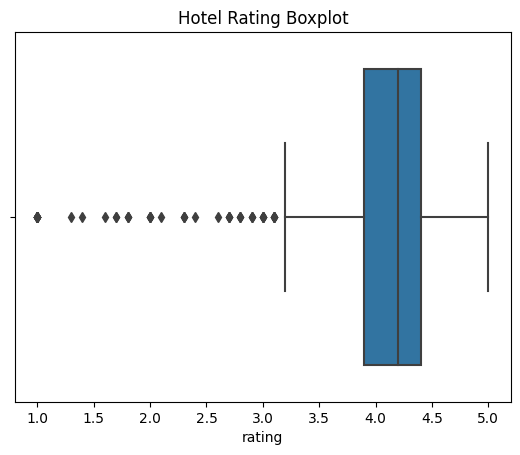

In [6]:
sns.boxplot(x=hotel['rating'])
plt.title('Hotel Rating Boxplot')
plt.show()

In [7]:
Q1 = hotel['rating'].quantile(0.25)
Q3 = hotel['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_treshold = Q1 - 1.5 * IQR

hotel = hotel[hotel['rating'] >= lower_bound_treshold]
hotel

,name,category,address_full,latitude,longitude,rating,reviews_count
47,Mercure Surabaya Grand Mirama,Hotel,"Mercure Surabaya Grand Mirama, Jl. Raya Darmo ...",-7.284845,112.739307,4.6,17176
14,JW Marriott Hotel Surabaya,Hotel,"JW Marriott Hotel Surabaya, Jl. Embong Malang ...",-7.259397,112.734548,4.7,17020
40,Vasa Hotel Surabaya,Hotel,"Vasa Hotel Surabaya, Jl. Mayjen HR. Muhammad N...",-7.286145,112.699322,4.7,15863
44,favehotel Rungkut Surabaya,Hotel,"favehotel Rungkut Surabaya, Jl. Raya Kalirungk...",-7.320455,112.772306,4.7,12515
159,Bumi Surabaya City Resort,Resort hotel,"Bumi Surabaya City Resort, Jl. Jenderal Basuki...",-7.271086,112.741175,4.7,12502
...,...,...,...,...,...,...,...
425,SPOT ON 92786 Homestay Barokah,Hotel,"SPOT ON 92786 Homestay Barokah, 1 Jalan Kyai H...",-7.153765,112.658002,5.0,1
432,SPOT ON 92902 Sunyoto Homestay Syariah,Hotel,"SPOT ON 92902 Sunyoto Homestay Syariah, 9, Men...",-7.508502,112.540929,5.0,1
453,Rumah Tujuh Guest House (R7),Lodge,"Rumah Tujuh Guest House (R7), Jl. Taman Gayung...",-7.327971,112.719346,5.0,1
132,Klampis Best Hotel,Hotel,"PQ6G+7R4 Klampis Best Hotel, Jl. Arief Rahman ...",-7.289373,112.777065,4.0,1


In [8]:
hotel.describe()

,latitude,longitude,rating,reviews_count
count,457.000000,457.000000,457.000000,457.000000
mean,-7.290270,112.735951,4.214223,1303.448578
std,0.045469,0.039216,0.366460,2506.651745
min,-7.508502,112.439046,3.200000,1.000000
25%,-7.311963,112.726610,4.000000,86.000000
50%,-7.282039,112.741139,4.200000,275.000000
75%,-7.263626,112.755061,4.500000,1140.000000
max,-7.115690,112.799721,5.000000,17176.000000


In [9]:
hotel = hotel[hotel['rating'] >= np.floor(hotel['rating'].mean())]
hotel

,name,category,address_full,latitude,longitude,rating,reviews_count
47,Mercure Surabaya Grand Mirama,Hotel,"Mercure Surabaya Grand Mirama, Jl. Raya Darmo ...",-7.284845,112.739307,4.6,17176
14,JW Marriott Hotel Surabaya,Hotel,"JW Marriott Hotel Surabaya, Jl. Embong Malang ...",-7.259397,112.734548,4.7,17020
40,Vasa Hotel Surabaya,Hotel,"Vasa Hotel Surabaya, Jl. Mayjen HR. Muhammad N...",-7.286145,112.699322,4.7,15863
44,favehotel Rungkut Surabaya,Hotel,"favehotel Rungkut Surabaya, Jl. Raya Kalirungk...",-7.320455,112.772306,4.7,12515
159,Bumi Surabaya City Resort,Resort hotel,"Bumi Surabaya City Resort, Jl. Jenderal Basuki...",-7.271086,112.741175,4.7,12502
...,...,...,...,...,...,...,...
425,SPOT ON 92786 Homestay Barokah,Hotel,"SPOT ON 92786 Homestay Barokah, 1 Jalan Kyai H...",-7.153765,112.658002,5.0,1
432,SPOT ON 92902 Sunyoto Homestay Syariah,Hotel,"SPOT ON 92902 Sunyoto Homestay Syariah, 9, Men...",-7.508502,112.540929,5.0,1
453,Rumah Tujuh Guest House (R7),Lodge,"Rumah Tujuh Guest House (R7), Jl. Taman Gayung...",-7.327971,112.719346,5.0,1
132,Klampis Best Hotel,Hotel,"PQ6G+7R4 Klampis Best Hotel, Jl. Arief Rahman ...",-7.289373,112.777065,4.0,1


In [10]:
hotel.describe()

,latitude,longitude,rating,reviews_count
count,362.000000,362.000000,362.000000,362.000000
mean,-7.288078,112.736049,4.355249,1565.378453
std,0.040449,0.038076,0.253917,2751.967334
min,-7.508502,112.439046,4.000000,1.000000
25%,-7.309668,112.726139,4.200000,87.000000
50%,-7.280674,112.740833,4.300000,326.000000
75%,-7.263853,112.755050,4.500000,1948.250000
max,-7.115690,112.799721,5.000000,17176.000000


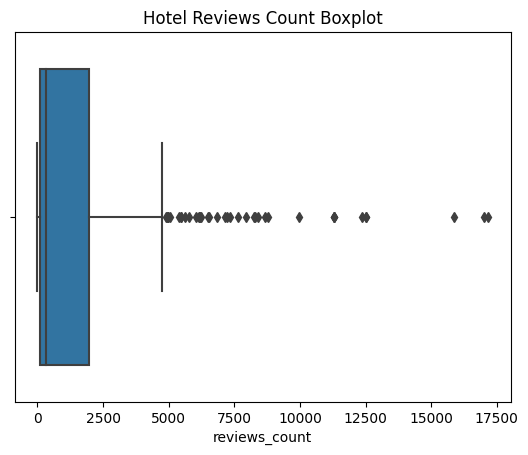

In [11]:
sns.boxplot(x=hotel['reviews_count'])
plt.title('Hotel Reviews Count Boxplot')
plt.show()

In [12]:
Q2 = hotel['reviews_count'].quantile(0.5)
hotel = hotel[hotel['reviews_count'] >= Q2]
hotel

,name,category,address_full,latitude,longitude,rating,reviews_count
47,Mercure Surabaya Grand Mirama,Hotel,"Mercure Surabaya Grand Mirama, Jl. Raya Darmo ...",-7.284845,112.739307,4.6,17176
14,JW Marriott Hotel Surabaya,Hotel,"JW Marriott Hotel Surabaya, Jl. Embong Malang ...",-7.259397,112.734548,4.7,17020
40,Vasa Hotel Surabaya,Hotel,"Vasa Hotel Surabaya, Jl. Mayjen HR. Muhammad N...",-7.286145,112.699322,4.7,15863
44,favehotel Rungkut Surabaya,Hotel,"favehotel Rungkut Surabaya, Jl. Raya Kalirungk...",-7.320455,112.772306,4.7,12515
159,Bumi Surabaya City Resort,Resort hotel,"Bumi Surabaya City Resort, Jl. Jenderal Basuki...",-7.271086,112.741175,4.7,12502
...,...,...,...,...,...,...,...
482,Box Hotel,Hotel,"Box Hotel, Jl. Raya Kupang Baru No.19B-C, Duku...",-7.278433,112.703646,4.2,354
491,Cosmo Hotel Dan Spa,Hotel,"Cosmo Hotel Dan Spa, Gedung Go Skate, Jl. Embo...",-7.260665,112.737874,4.3,353
404,Pondok Asri Hotel,Hotel,"Pondok Asri Hotel, Jl. Kalibokor Selatan No.10...",-7.287308,112.754539,4.3,351
308,RedDoorz Syariah @ Sedati,Hotel,"RedDoorz Syariah @ Sedati, Jl. Mangkurejo No.1...",-7.396781,112.762917,4.3,338


In [13]:
hotel.describe()

,latitude,longitude,rating,reviews_count
count,181.000000,181.000000,181.000000,181.000000
mean,-7.283446,112.741408,4.354696,3026.303867
std,0.030400,0.023710,0.216904,3299.799939
min,-7.396781,112.641318,4.000000,333.000000
25%,-7.294322,112.733341,4.200000,658.000000
50%,-7.276133,112.741318,4.400000,1952.000000
75%,-7.263626,112.751011,4.500000,3845.000000
max,-7.225482,112.795631,4.800000,17176.000000


In [14]:
hotel.to_excel('Hotel_List_Preprocessed.xlsx', index=False)